In [37]:
import numpy as np
from scipy import stats
import pandas
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [38]:
from statsmodels.graphics.api import qqplot

In [39]:
print sm.datasets.sunspots.NOTE

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [40]:
dta = sm.datasets.sunspots.load_pandas().data

In [41]:
dta.index = pandas.Index(sm.tsa.datetools.dates_from_range('1700','2008'))
del dta["YEAR"]

In [47]:
dta.plot(figsize=(12,8))

In [48]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

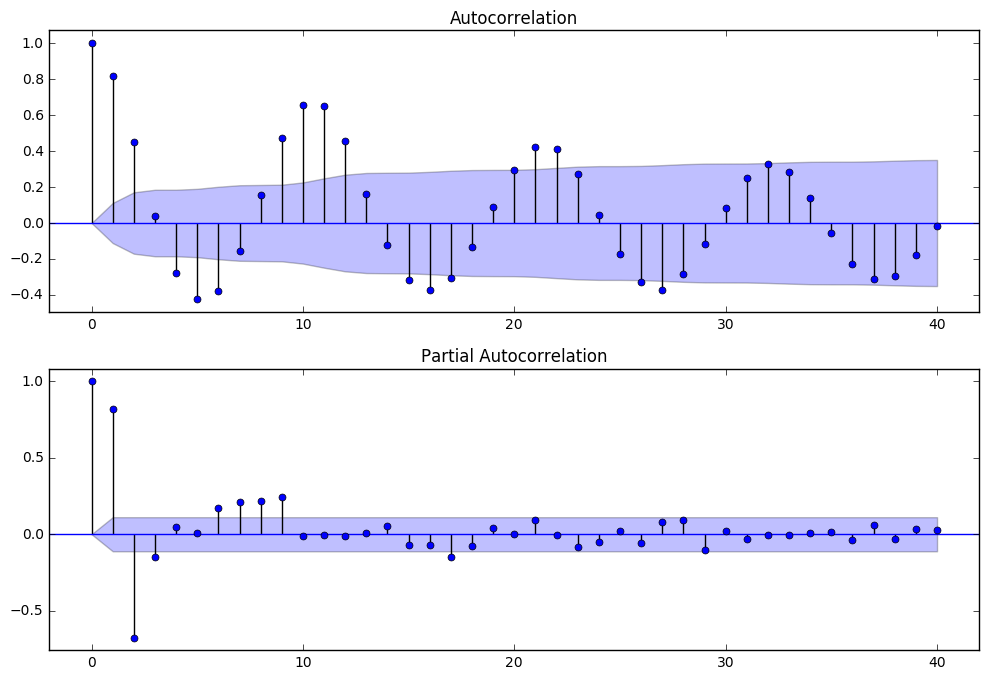

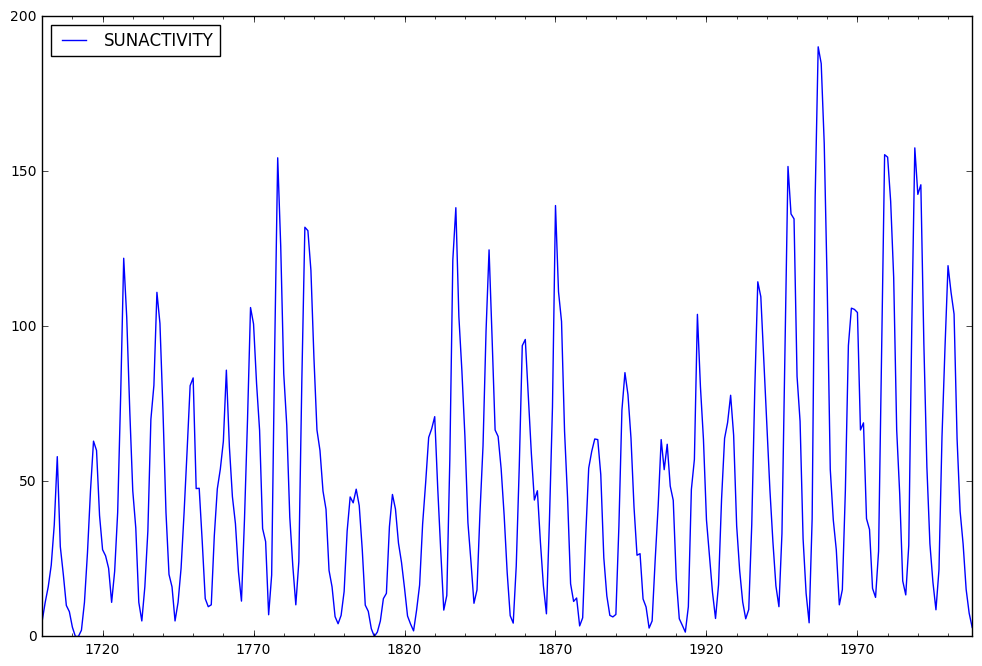

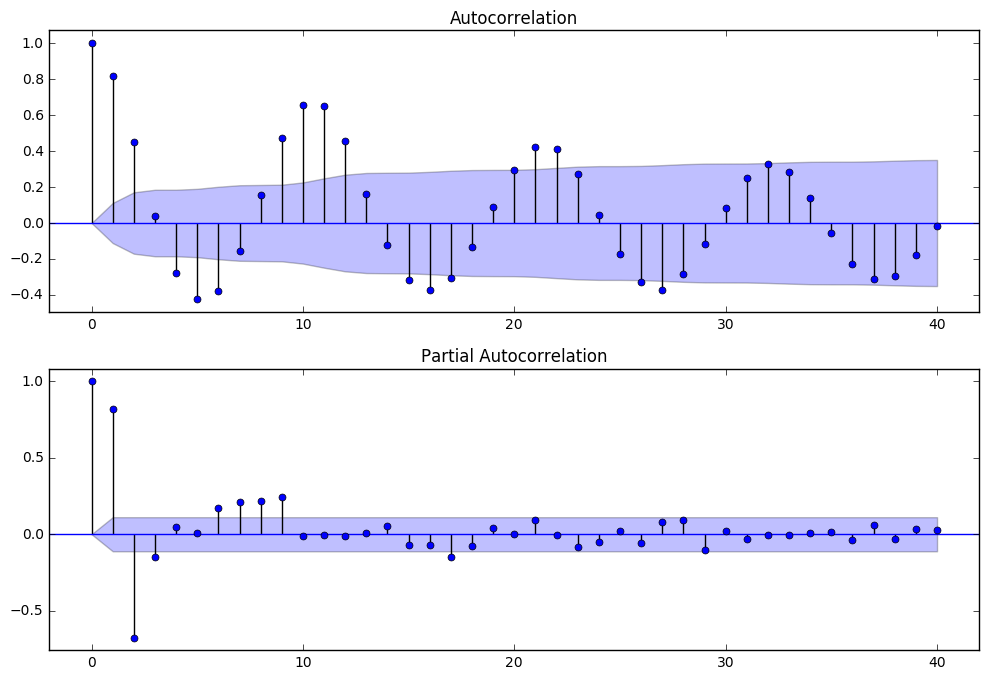

In [49]:
plt.show()

In [51]:
arma_mode20 = sm.tsa.ARMA(dta,(2,0)).fit()
print arma_mode20.params

const                49.659343
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


In [54]:
arma_mode30 = sm.tsa.ARMA(dta,(3,0)).fit()

In [56]:
print arma_mode20.aic, arma_mode20.bic,arma_mode20.hqic

2622.63633806 2637.56970317 2628.60672591


In [57]:
print arma_mode30.aic, arma_mode30.bic,arma_mode30.hqic

2619.4036287 2638.07033508 2626.8666135


In [58]:
sm.stats.durbin_watson(arma_mode30.resid.values)

1.9564809484851813

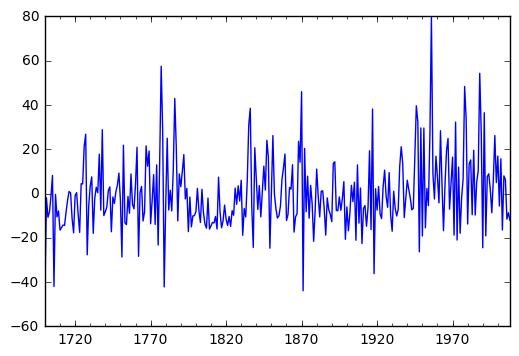

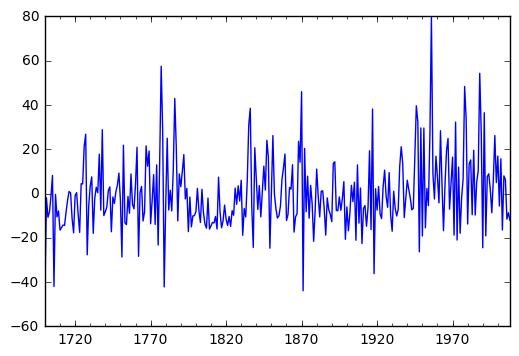

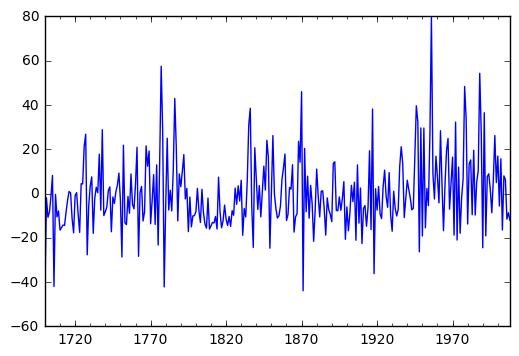

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = arma_mode30.resid.plot(ax=ax)
plt.show()